## Dataset 
### Magic telescope data set. 

This data set was created by MC (Monte Carlo ) simulations for the registration of high energy gamma particles by atmospheric 1 gamma telescope. The features of the dataset are pulses created by the incoming Cherenkov photons on the photomultiplier tubes of the telescope. Depending on the            received energy, the primary gamma, several Cherenkov photons get collected, in patterns            (called the shower image), allowing to discriminate statistically those caused by primary            gammas signal from the images of hadronic showers initiated by cosmic rays (class: signal)            or background signal found in the upper atmosphere (class: background)

Dataset Size: 19020 rows × 11 columns

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import matplotlib
import scipy
import numpy as np
import sklearn
from  sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import MinMaxScaler
from numpy import genfromtxt
from pandas.plotting import scatter_matrix


In [4]:
url= "dataset.csv"
names = ["fl", "fw", "size", "fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
data = pd.read_csv( url ,sep=',',
                  names = names)

In [9]:

#     1.  fLength:  continuous  # major axis of ellipse [mm]
#     2.  fWidth:   continuous  # minor axis of ellipse [mm]
#     3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
#     4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
#     5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
#     6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
#     7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
#     8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
#     9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
#    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
#    11.  class:    g,h         # gamma (signal), hadron (background)


In [10]:
data

,fl,fw,size,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## Uni-variate analysis 

Uni-variate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and its major purpose is to describe; it takes data, summarizes that data and finds patterns in the data

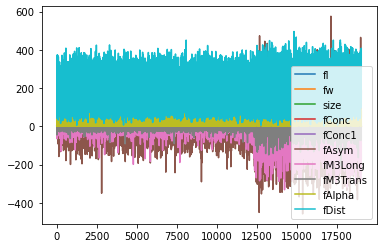

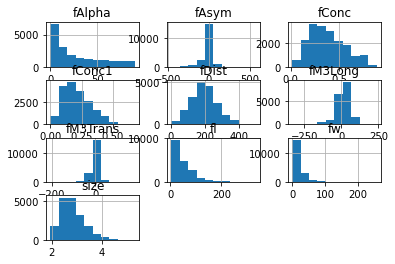

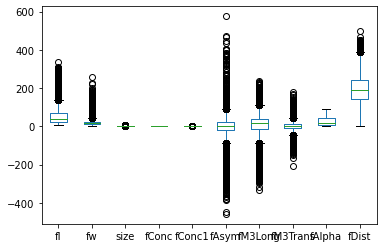

In [11]:
#Plot histogram and boxplot (uni-variate analysis)

data.plot()
data.hist()
data.plot(kind='box')
plt.show()

## Bivariate analysis 

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences

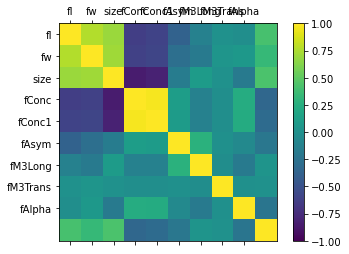

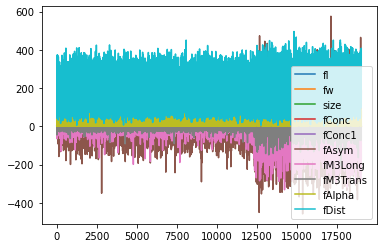

In [12]:
# plot correlation matrix (Bi-variate analysis)
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
data.plot()
plt.show()

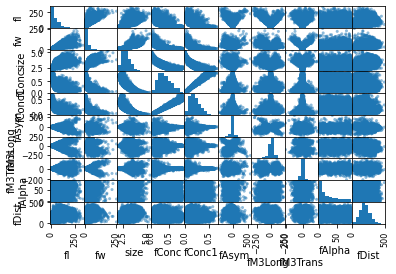

In [13]:
#plot scatterplot matrix (Bi-variate analysis)

scatter_matrix(data)
plt.show()

## Preprocessing/ transformation

In [16]:
#Preprocessing/ transformation
# Based on the results thus far, consider
# whether you want to filter out some features ( feature selection ) or
# whether you want to create derived features ( feature transformation ).

print("Preprocessing/ transformation")
# 1. Scale Data

array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# 2. Standardize Data

scaler2 = MinMaxScaler().fit(X)
rescaledX = scaler2.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])


# 3. Normalize Data

scaler3 = MinMaxScaler().fit(X)
normalizedX = scaler3.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])
'''
#  4. Binarize Data (Make Binary)

binarizer = MinMaxScaler(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:])
'''


Preprocessing/ transformation
[[0.074 0.062 0.208 0.43  0.293 0.47  0.621 0.512]
 [0.083 0.046 0.171 0.588 0.559 0.469 0.624 0.508]
 [0.478 0.531 0.627 0.028 0.027 0.556 0.468 0.417]
 [0.059 0.037 0.117 0.684 0.581 0.47  0.571 0.515]
 [0.215 0.121 0.361 0.345 0.271 0.438 0.632 0.59 ]]
[[0.074 0.062 0.208 0.43  0.293 0.47  0.621 0.512]
 [0.083 0.046 0.171 0.588 0.559 0.469 0.624 0.508]
 [0.478 0.531 0.627 0.028 0.027 0.556 0.468 0.417]
 [0.059 0.037 0.117 0.684 0.581 0.47  0.571 0.515]
 [0.215 0.121 0.361 0.345 0.271 0.438 0.632 0.59 ]]
[[0.074 0.062 0.208 0.43  0.293 0.47  0.621 0.512]
 [0.083 0.046 0.171 0.588 0.559 0.469 0.624 0.508]
 [0.478 0.531 0.627 0.028 0.027 0.556 0.468 0.417]
 [0.059 0.037 0.117 0.684 0.581 0.47  0.571 0.515]
 [0.215 0.121 0.361 0.345 0.271 0.438 0.632 0.59 ]]


'\n#  4. Binarize Data (Make Binary)\n\nbinarizer = MinMaxScaler(threshold=0.0).fit(X)\nbinaryX = binarizer.transform(X)\n# summarize transformed data\nnp.set_printoptions(precision=3)\nprint(binaryX[0:5,:])\n'

## Classification ( KNN algorithm, SVM, Decision Tree)

In [17]:
# Classification

print("CLASSIFICATION----knn-ALGORITHM-----")
#KNN-ALGORITHM neighbor model to the data
# the columns that we will be making predictions with.
x_columns= ["fl", "fw", "size", "fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist"]
#the column which we want to predict
y_colums=["class"]

#divide the data intto train data and test data
x_train, x_test, y_train, y_test= train_test_split(data[x_columns],data[y_colums],test_size=0.3,random_state=0)

#create KNN- algorithm
#look at the four closest neighbours
model=KNeighborsClassifier(n_neighbors=4)

#fit the model on the training data
model.fit(x_train,y_train.values.ravel())
#make point predictions on the test set using the fit model
predicted=model.predict(x_test)
#calculate accuracy
print("accuracy is", accuracy_score(y_test,predicted))
print(metrics.classification_report(y_test,predicted))
#calculate confusion matrix
confusion=metrics.confusion_matrix(y_test,predicted)
print("confusion")
print(confusion)


CLASSIFICATION----knn-ALGORITHM-----
accuracy is 0.7984577637574483
              precision    recall  f1-score   support

           g       0.78      0.95      0.86      3689
           h       0.86      0.51      0.64      2017

    accuracy                           0.80      5706
   macro avg       0.82      0.73      0.75      5706
weighted avg       0.81      0.80      0.78      5706

confusion
[[3519  170]
 [ 980 1037]]


In [18]:
print("(Support vector machines (SVMs) algorithm")

#SVM (Support vector machines (SVMs) algorithm


svm=SVC()
svm.fit(x_train,y_train.values.ravel())
predicted=svm.predict(x_test)
print("SVM")

print("accuracy is", accuracy_score(y_test,predicted))
print(metrics.classification_report(y_test,predicted))
#calculate confusion matrix
confusion=metrics.confusion_matrix(y_test,predicted)
print("confusion")
print(confusion)

TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

sensitivity=TP/float(FN+TP)
print("sensitivity is", sensitivity)

specificity=TN/(TN+FP)
print("specificity is", specificity)



(Support vector machines (SVMs) algorithm
SVM
accuracy is 0.8256221521205749
              precision    recall  f1-score   support

           g       0.81      0.96      0.88      3689
           h       0.88      0.58      0.70      2017

    accuracy                           0.83      5706
   macro avg       0.85      0.77      0.79      5706
weighted avg       0.83      0.83      0.82      5706

confusion
[[3533  156]
 [ 839 1178]]
sensitivity is 0.5840356965790778
specificity is 0.9577121171049064


In [19]:
#DECISON TREES ALGORITHM


print(" --------------DTs Decision trees algorithm-----------")

print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

print ("Dataset:: ")
data.head()



clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train.values.ravel())


clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)


#Gini Index predicton on test datasetPython

y_pred = clf_gini.predict(x_test)

print( "Accuracy is ", accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
#calculate confusion matrix
confusion=metrics.confusion_matrix(y_test,y_pred)
print("confusion")
print(confusion)

 --------------DTs Decision trees algorithm-----------
Dataset Lenght::  19020
Dataset Shape::  (19020, 11)
Dataset:: 
Accuracy is  0.8010865755345251
              precision    recall  f1-score   support

           g       0.83      0.87      0.85      3689
           h       0.74      0.67      0.70      2017

    accuracy                           0.80      5706
   macro avg       0.79      0.77      0.78      5706
weighted avg       0.80      0.80      0.80      5706

confusion
[[3215  474]
 [ 661 1356]]
